# CREDIT CARD FRAUD DETECTION

# IMPORTING NECESSARY LIBRARIES

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [3]:
CCdf = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\VSCodePrograms\\codsoft_task3\\creditcard.csv')
CCdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# OVERVIEW OF THE DATASET

In [4]:
def DataOverview(CCdf, msg):
  print(f'{msg}\n')
  print(f'Data has {CCdf.shape} rows and columns respectively\n')
  print(f'COLUMNS LIST: {CCdf.columns}\n')
  print(f'DATA TYPE OF EACH COLUMN:\n{CCdf.dtypes}\n')
  print(f'DESCRIPTIVE DATA OF THE NUMERIC COLUMNS:\n{CCdf.describe()}\n')
  print(f'NULL VALUES COUNT:\n{CCdf.isnull().sum()}\n')
  print(f'DUPLICATE VALUES COUNT:\n{CCdf.duplicated().value_counts()}')

DataOverview(CCdf, 'Credit Card Dataset Overview...')

Credit Card Dataset Overview...

Data has (284807, 31) rows and columns respectively

COLUMNS LIST: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

DATA TYPE OF EACH COLUMN:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

DESCRIPTIVE DATA OF THE NUMERIC COL

# INFERENCES

* The dataset has 284807 records and 31 features.
* All the features in the dataset have numeric data only.
* The dataset has no null values.
* The dataset has 1081 duplicated values.

# DATA CLEANING

In [5]:
CCdf = CCdf.drop_duplicates()

CCdf.duplicated().any()

False

In [6]:
CCdf.shape

(283726, 31)

# DATA ANALYSIS AND VISUALIZATION

<Axes: >

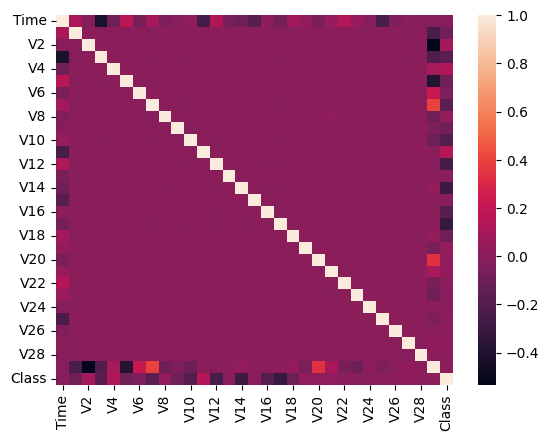

In [7]:
sns.heatmap(CCdf.corr())

In [8]:
CCdf.Class.unique()

array([0, 1], dtype=int64)

*The Class feature has values 0 and 1 representing if the transaction is legitimate or a fraud.*

In [9]:
[Valid, Fraud] = CCdf.Class.value_counts()

print(f'Valid: {Valid}')
print(f'Fraud: {Fraud}')

Valid: 283253
Fraud: 473


<Axes: xlabel='Class', ylabel='count'>

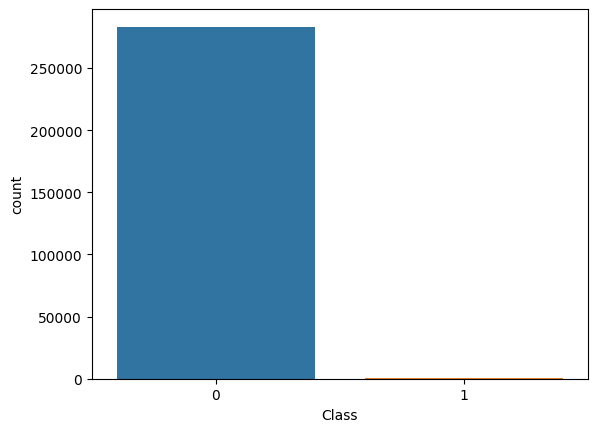

In [10]:
sns.countplot(x = CCdf['Class'])

*The dataset has highly imbalanced data.*
*Learning from such a dataset will make our model biased.*

# HANDLING IMBALANCE DATA

# SMOTE TECHNIQUE

In [11]:
x = CCdf.drop('Class', axis=1)
y = CCdf['Class']

In [12]:
smote = SMOTE(random_state=42)
x_sample, y_sample = smote.fit_resample(x, y)

  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [13]:
[Valid, Fraud] = y_sample.value_counts()

print(f'Valid: {Valid}')
print(f'Fraud: {Fraud}')

Valid: 283253
Fraud: 283253


<Axes: xlabel='Class', ylabel='count'>

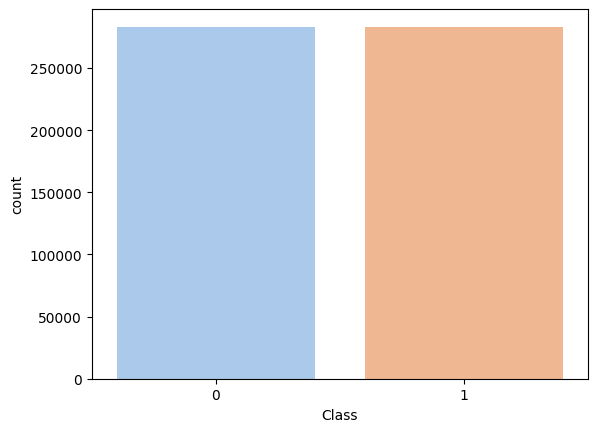

In [14]:
sns.countplot(x = y_sample, palette='pastel')

# TRAIN - TEST SPLIT

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

In [16]:
print('train and test data shape:\n')
print(f'x_train: {x_train.shape}\n')
print(f'x_test: {x_test.shape}')

train and test data shape:

x_train: (453204, 30)

x_test: (113302, 30)


# MODEL SELECTION

In [17]:
LogReg = LogisticRegression()
cv = cross_val_score(LogReg, x_train, y_train, cv=5)
cv.mean()

0.961792026457869

In [18]:
DTC = DecisionTreeClassifier()
cv = cross_val_score(DTC, x_train, y_train, cv=5)
cv.mean()

0.9981531490735109

In [19]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

*Decision Tree Classifier is the best fit*

# MODEL PREDICTIONS

In [27]:
y_pred = DTC.predict(x_test)

# MODEL EVALUATION

In [28]:
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score of the model is {acc_score}')

Accuracy Score of the model is 0.9987290603872836


In [29]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,56358,105
1,39,56800


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



# THANK YOU

# HAPPY EXPLORATION!